1) How will you address null values and what is your strategy for addressing the outliers in the data?
2) What are the business insights on univariate analysis of customer earnings, customer spending, and website vs store purchases among customers? 
3) How is the income level of customers associated with % acceptance across different campaigns?Do you find any other interesting correlation between variables?

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

In [3]:

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [5]:
# To encode the variable
from sklearn.preprocessing import LabelEncoder

In [6]:
# Importing PCA for Linear analytics
from sklearn.decomposition import PCA

In [7]:
# Importing TSNE for non-linear analytics
from sklearn.manifold import TSNE

In [8]:
# Importing K-Means for cluster by mean values with lowest distances
from sklearn.cluster import KMeans

In [11]:
# To import K-Medoids for clustering by data point centroid with least variance
from sklearn_extra.cluster import KMedoids

In [10]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [16]:
data = pd.read_csv(r'C:\Users\USER\Downloads\marketing_campaign.csv') 

print (data)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  04-09-2012       58       635  ...          

In [21]:
data = data.dropna()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [22]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
data.shape

(2240, 27)

# Looking for and adressing both null values and outliers


In [19]:
# checking for unique values high enough to drop adding little or no value to data analytics.
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [23]:
# Finding the percentage of missing values in each column
(data.isnull().sum()/data.shape[0] * 100)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

In [24]:
numerical_columns = [
    'Year_Birth',
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Recency']
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0
NumDealsPurchases,2216.0,2.323556,1.923716,0.0,1.0,2.0,3.00,15.0
NumWebPurchases,2216.0,4.085289,2.740951,0.0,2.0,4.0,6.00,27.0


In [26]:
categorical_columns = ['Education', 'Marital_Status']

# Number of unique observations in each category
for column in categorical_columns:
    print("-" * 38)
    print("Unique values in", column, "are :")
    print(" ")
    print(data[column].value_counts(normalize = True))
    print("-" * 38)
    print(" \n")

--------------------------------------
Unique values in Education are :
 
Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64
--------------------------------------
 

--------------------------------------
Unique values in Marital_Status are :
 
Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64
--------------------------------------
 



In [28]:
boolean_columns = [
    'Kidhome',
    'Teenhome',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain']
data[boolean_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.0,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.0,2.0
AcceptedCmp1,2216.0,0.064079,0.244950,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2216.0,0.013087,0.113672,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2216.0,0.073556,0.261106,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2216.0,0.074007,0.261842,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2216.0,0.073105,0.260367,0.0,0.0,0.0,0.0,1.0
Response,2216.0,0.150271,0.357417,0.0,0.0,0.0,0.0,1.0
Complain,2216.0,0.009477,0.096907,0.0,0.0,0.0,0.0,1.0


In [25]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013087,0.009477,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.113672,0.096907,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Dropping ID column: "ID has all unique values and will be dropped"
data.drop(columns = "ID", inplace = True)

# Dropping Complain column: "Average complaints is less that 1%, this column will be dropped"
data.drop(columns = "Complain", inplace = True)

In [30]:
data['Age'] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year)

# Dropping Year_Birth column: "Create a new column "Age" and calculate the Age then drop the "Year_Birth" column"
data.drop(columns = "Year_Birth", inplace = True)

In [31]:
# Better Insights: Total customer spending across all products
ttl_spending = [col for col in data.columns if 'Mnt' in col]
data['Total_Spending'] = data[ttl_spending].sum(axis = 1)


In [32]:
# Better Insights: Total customer spending across all products
ttl_purchases = [col for col in data.columns if 'Purchases' in col]
data['Total_Purchases'] = data[ttl_purchases].sum(axis = 1)


In [33]:
# Better Insights: Total number of offers accepted by a customer
campaigns_cols = [col for col in data.columns if 'Cmp' in col]
data['Total_Campaigns_Accepted'] = data[campaigns_cols].sum(axis = 1)

In [34]:
# Customers that have children at home
data['Children'] = data['Teenhome'] + data['Kidhome']

# Dropping Teenhome and Kidhome columns
data.drop(columns = "Kidhome", inplace = True)
data.drop(columns = "Teenhome", inplace = True)

In [35]:
#Better Insights: Create Relationship variable
data['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True) 

In [36]:
#Better Insights: Create Relationship variable
data['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True) 

In [37]:
# Check the shape of the data
data.shape

(2216, 27)

In [38]:
# Verifying there are no missing values
data.isnull().sum()

Education                   0
Marital_Status              0
Income                      0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Response                    0
Age                         0
Total_Spending              0
Total_Purchases             0
Total_Campaigns_Accepted    0
Children                    0
dtype: int64

Checking and handling outliers

Age
Skew : 0.35


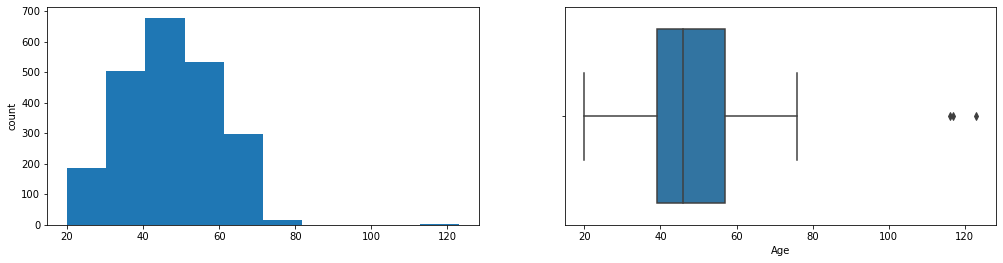

Income
Skew : 6.76


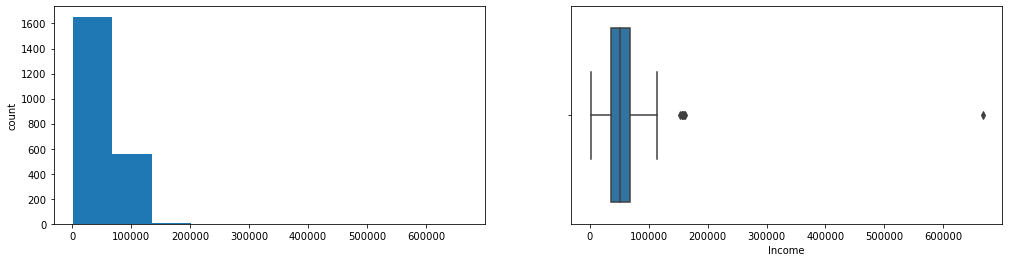

Total_Purchases
Skew : 0.25


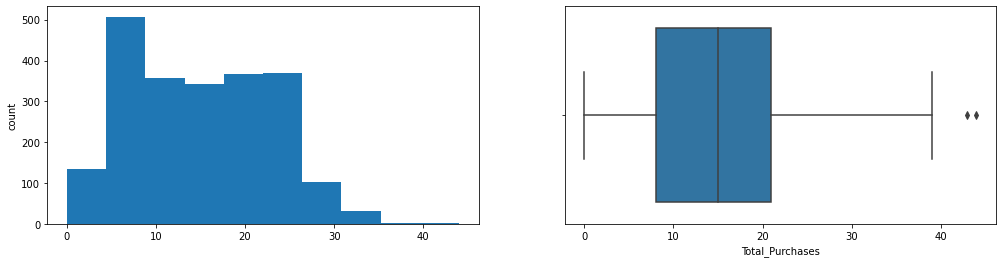

Total_Spending
Skew : 0.86


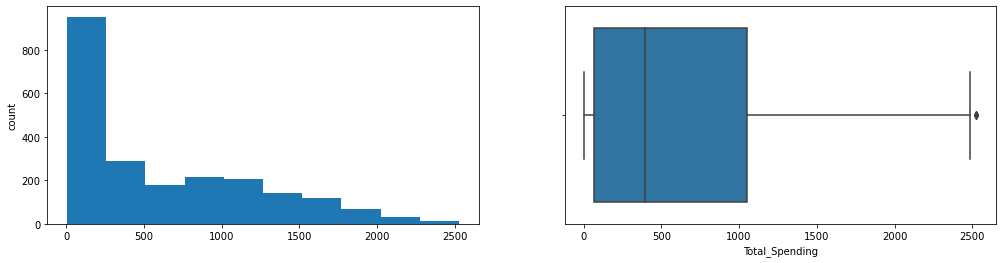

MntWines
Skew : 1.17


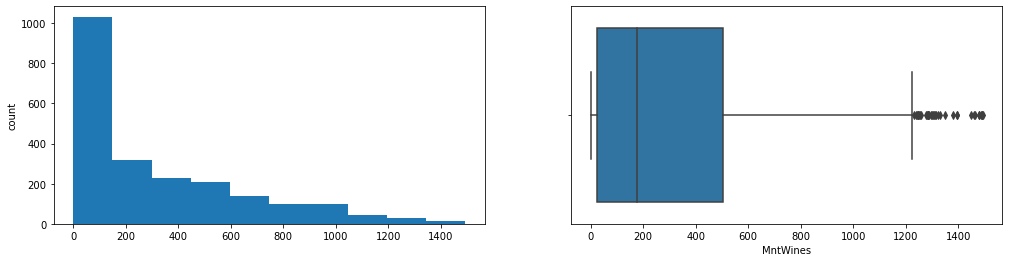

MntFruits
Skew : 2.1


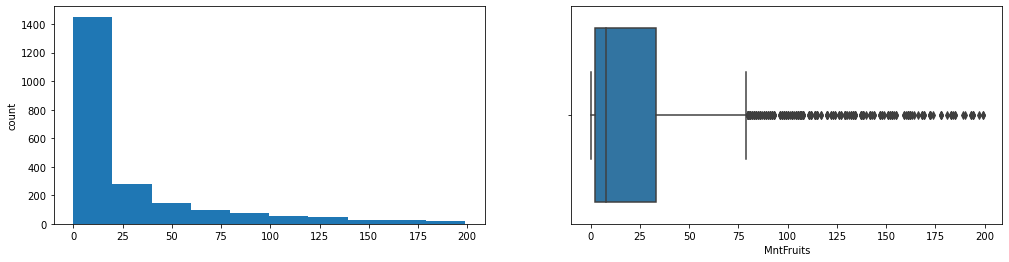

MntMeatProducts
Skew : 2.03


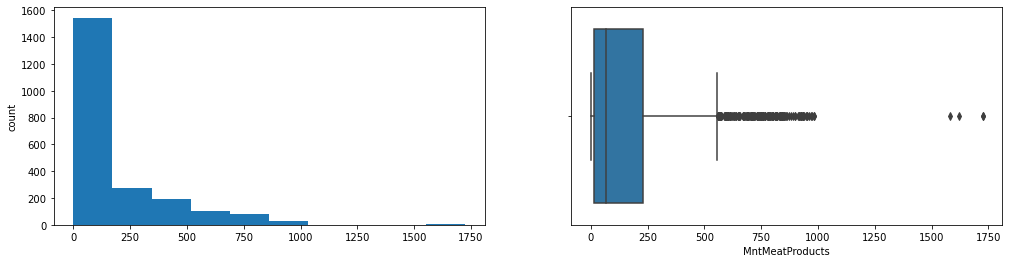

MntFishProducts
Skew : 1.92


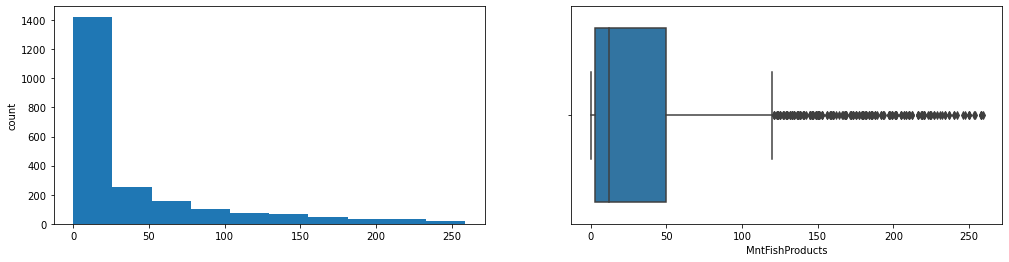

MntSweetProducts
Skew : 2.1


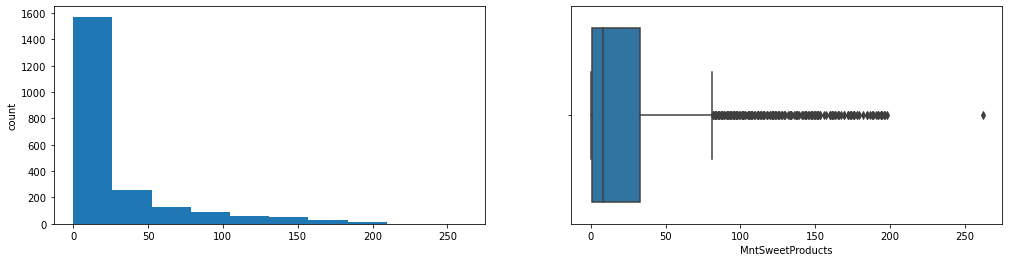

MntGoldProds
Skew : 1.84


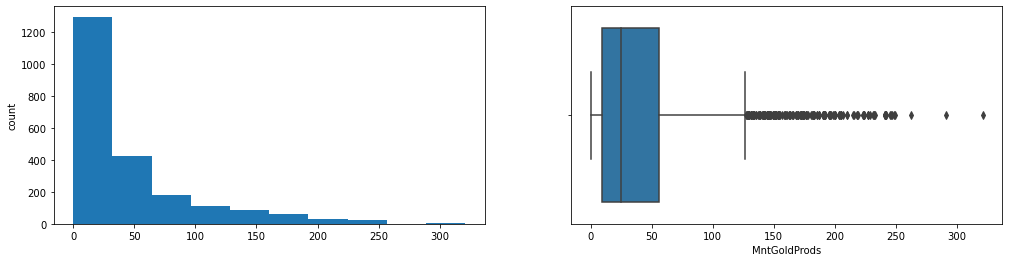

NumDealsPurchases
Skew : 2.42


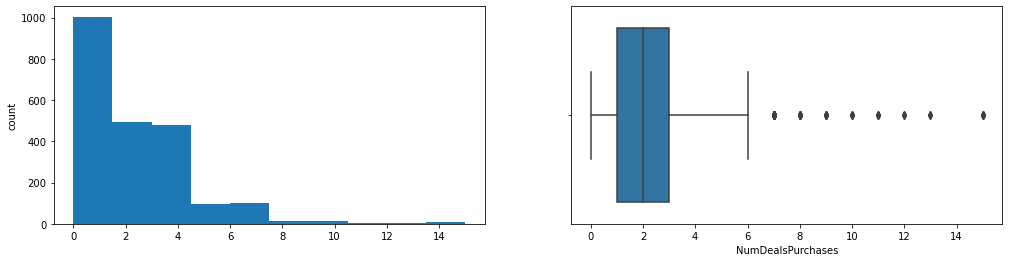

NumWebPurchases
Skew : 1.2


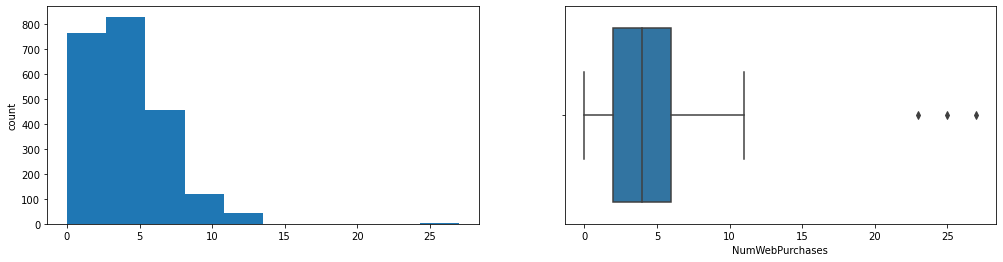

NumCatalogPurchases
Skew : 1.88


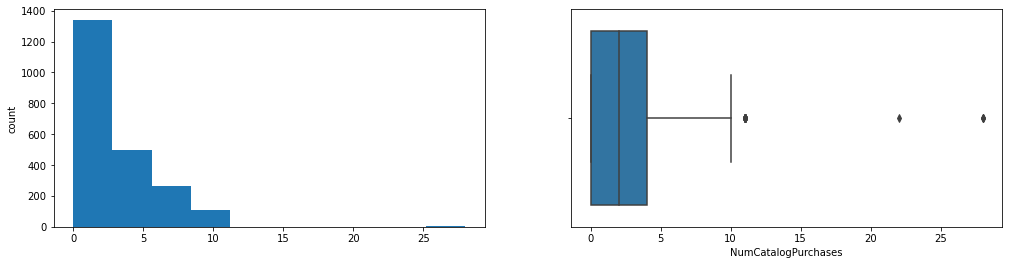

NumStorePurchases
Skew : 0.7


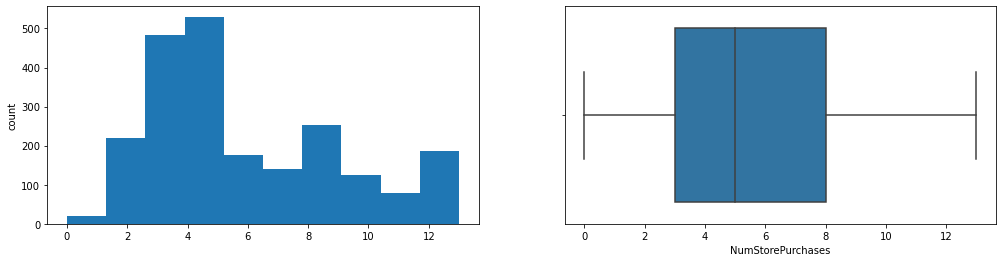

NumWebVisitsMonth
Skew : 0.22


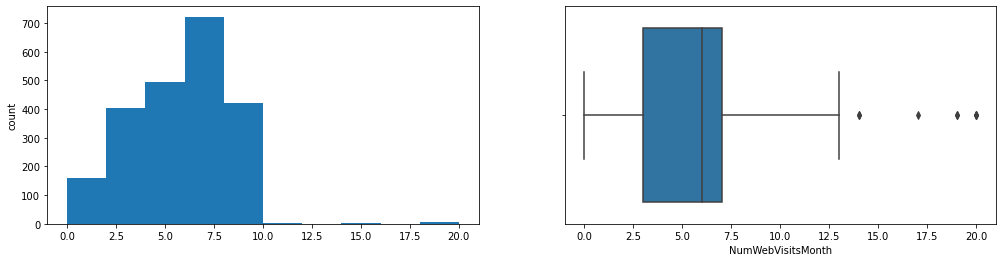

Recency
Skew : 0.0


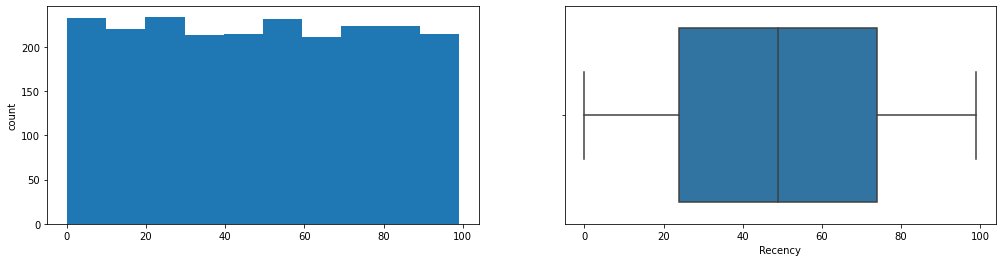

Total_Campaigns_Accepted
Skew : 2.71


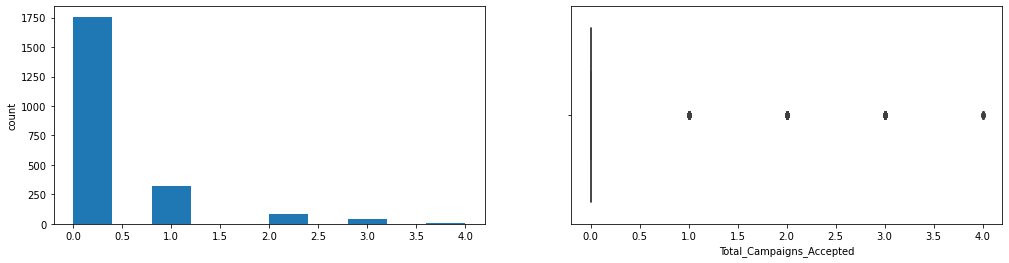

In [45]:
# Plotting the histogram and boxplot for numerical variables
numerical_columns = ['Age',
                     'Income',
                     'Total_Purchases',
                     'Total_Spending',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'NumDealsPurchases',
                     'NumWebPurchases',
                     'NumCatalogPurchases',
                     'NumStorePurchases',
                     'NumWebVisitsMonth',
                     'Recency',
                     'Total_Campaigns_Accepted']
for col in numerical_columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize = (17, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins = 10, grid = False, )
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col],)
    plt.show()

In [46]:
# Check the 99.5 percentile for low numbers of extreme outliers
low_extreme_outliers = ['Age',
                'Income',
                'Total_Purchases',
                'Total_Spending',
                'MntWines',
                'MntSweetProducts',
                'MntGoldProds',
                'NumDealsPurchases',
                'NumWebPurchases',
                'NumCatalogPurchases',
                'NumWebVisitsMonth']

for col in low_extreme_outliers:
    print('The 99.5 percentile of',col,' is:',round(data.quantile(q=0.995)[col],2), '\n')

The 99.5 percentile of Age  is: 72.0 

The 99.5 percentile of Income  is: 102145.75 

The 99.5 percentile of Total_Purchases  is: 33.0 

The 99.5 percentile of Total_Spending  is: 2277.35 

The 99.5 percentile of MntWines  is: 1376.75 

The 99.5 percentile of MntSweetProducts  is: 190.85 

The 99.5 percentile of MntGoldProds  is: 241.0 

The 99.5 percentile of NumDealsPurchases  is: 12.0 

The 99.5 percentile of NumWebPurchases  is: 11.0 

The 99.5 percentile of NumCatalogPurchases  is: 11.0 

The 99.5 percentile of NumWebVisitsMonth  is: 9.93 



In [50]:
# Dropping rows with variables outside the 99.5 percentile
data = data[data.Age < 73]
data = data[data.Income < 103000]
data = data[data.Total_Purchases < 34]
data = data[data.Total_Spending < 2275]
data = data[data.MntWines < 1374]
data = data[data.MntSweetProducts < 192]
data = data[data.MntGoldProds < 242]
data = data[data.NumDealsPurchases < 13]
data = data[data.NumWebPurchases < 12]
data = data[data.NumCatalogPurchases < 12]
data = data[data.NumWebVisitsMonth < 10]

In [52]:
# Check the shape of the data
data.shape

(2131, 27)

2) What are the business insights on univariate analysis of customer earnings, customer spending,and website vs store purchases among customers?

There are a lot of outliers in several of the columns. The cluster analysis may be impacted by the sensitivity of the cluster approach, K-Means, to outliers.

Rows in columns having outliers outside the 99.5 percentile will be eliminated, and 87 rows with severe outliers were removed.

The updated dataset has 27 columns and 2153 rows.

Customers between the ages of 40 and 50 make the most purchases.

Most clients make less than $75,000.

More clients make purchases under $250.

Customers spend between $5 and $9 every month on merchandise.

Customers visit the website on average seven times every month.

Customers buy four or more things from shops, three or less items from catalogs, three to five items online, and one discount.

3) How is the income level of customers associated with % acceptance across different campaigns?Do you find any other interesting correlation between variables?

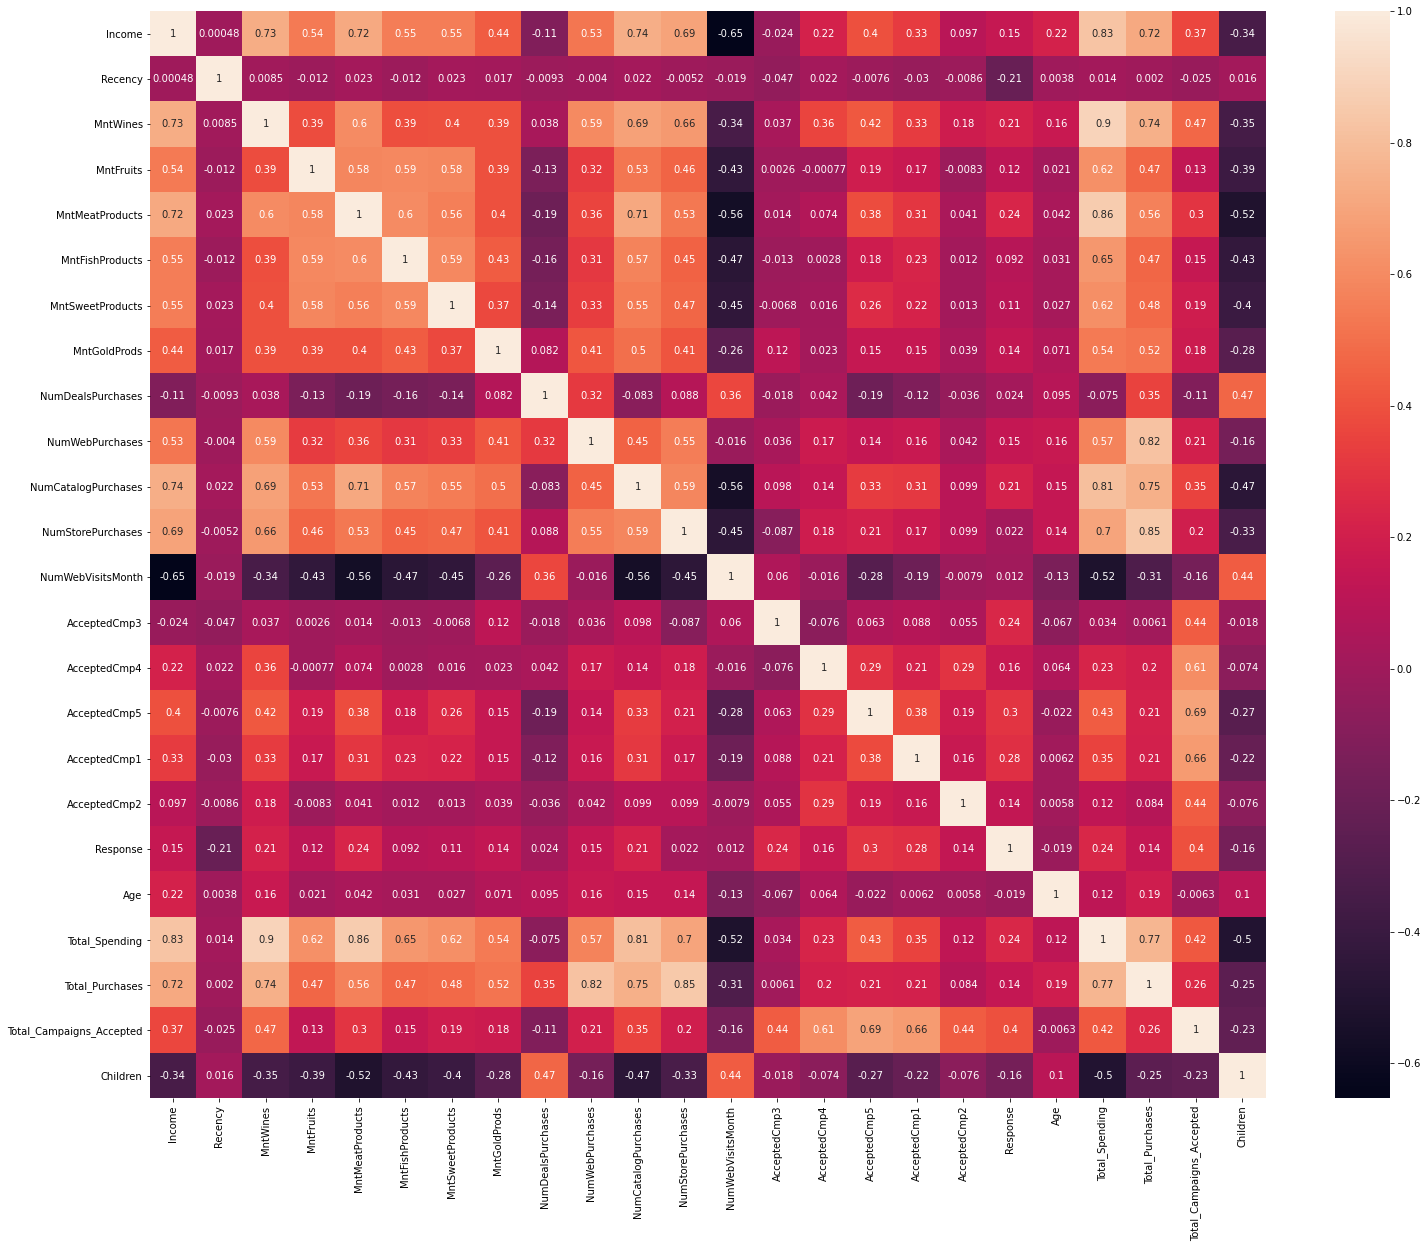

In [56]:
# Plot the correlation of the new data
plt.figure(figsize = (25, 20))

# Giving the correlation plot a different color map (cmap)
sns.heatmap(data.corr(), annot = True,)
plt.show()

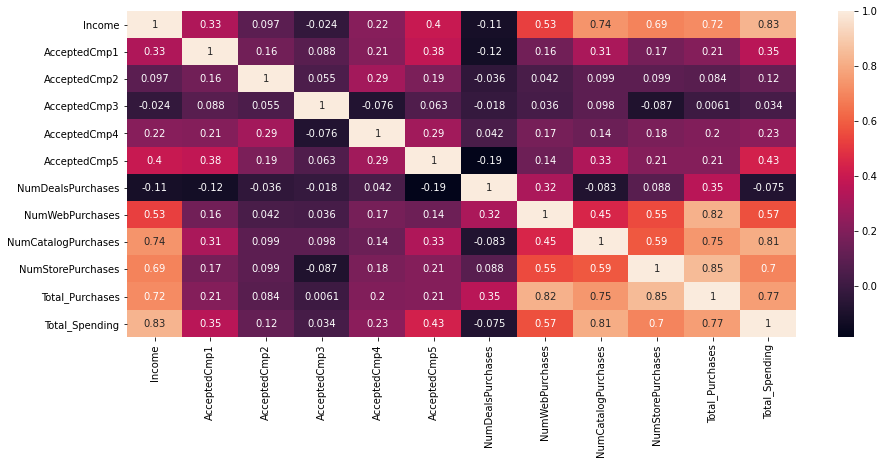

In [58]:
# Plot the correlation for spending and purchases
corr = data[['Income', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases', 'Total_Spending']].corr()
plt.figure(figsize = (15, 6))

# Giving the correlation plot a different color map (cmap)
sns.heatmap(corr.T, annot = True,)
plt.show()